In [32]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("airbnb_cartagena.sqlite")
df_attributes = pd.read_sql_query("SELECT * FROM Attributes", conn)
df_time_series = pd.read_sql_query("SELECT * FROM TimeSeriesInterpolated", conn)
conn.close()
print(df_time_series.columns)
df_attributes=df_attributes[['Name', 'Host', 'Base fee', 'Cleaning fee', 'URL', 'ID', 'latitude',
       'longitude', 'Property type', 'Person capacity', 'accuracy_rating',
       'checking_rating', 'cleanliness_rating', 'communication_rating',
       'location_rating', 'value_rating', 'satisfaction_rating', 'Reviews',
       'Bedrooms', 'Beds', 'Baths', 'City skyline view', 'Beach view',
       'Sea/Lake view', 'Hot water', 'Jacuzzi', 'Shared pool', 'Shared gym',
       'Patio or balcony', 'Outdoor furniture', 'Outdoor playground',
       'Elevator', 'Carport', 'Dedicated workspace', 'AC', 'Heating', 'TV',
       'Cable TV', 'Wifi', 'Laundry service', 'Kitchen', 'Dining table',
       'Microwave', 'Dishes and silverware', 'Refrigerator', 'Stove',
        'Washer', 'Pets allowed',
     'Crib', 
        'Security cameras', 'Lock on door', 'Keypad']]
df_attributes["Base fee"]=df_attributes["Base fee"].map(lambda x:  x//20*20+10)
df_attributes.head()


Index(['Name', 'ID', 'Base fee', 'Cleaning fee', 'latitude', 'longitude',
       'Property type', 'Noches 05', 'Noches 06', 'Noches 07', '26/5/2025',
       '27/5/2025', '28/5/2025', '29/5/2025', '30/5/2025', '31/5/2025',
       '1/6/2025', '2/6/2025', '3/6/2025', '4/6/2025', '5/6/2025', '6/6/2025',
       '7/6/2025', '8/6/2025', '9/6/2025', '10/6/2025', '11/6/2025',
       '12/6/2025', '13/6/2025', '14/6/2025', '15/6/2025', '16/6/2025',
       '17/6/2025', '18/6/2025', '19/6/2025', '20/6/2025', '21/6/2025',
       '22/6/2025', '23/6/2025', '24/6/2025', '25/6/2025', '26/6/2025',
       '27/6/2025', '28/6/2025', '29/6/2025', '30/6/2025', '1/7/2025',
       '2/7/2025', '3/7/2025', '4/7/2025', '5/7/2025', '6/7/2025', '7/7/2025',
       '8/7/2025', '9/7/2025', '10/7/2025', '11/7/2025', '12/7/2025',
       '13/7/2025', '14/7/2025', '15/7/2025', '16/7/2025', '17/7/2025',
       '18/7/2025', '19/7/2025', '20/7/2025', '21/7/2025', '22/7/2025',
       '23/7/2025', '24/7/2025', '25/7/2025', '26/

,Name,Host,Base fee,Cleaning fee,URL,ID,latitude,longitude,Property type,Person capacity,...,Microwave,Dishes and silverware,Refrigerator,Stove,Washer,Pets allowed,Crib,Security cameras,Lock on door,Keypad
0,14th Floor/Jacuzzi balcony/SeaViews/Parking/King,Alejandra,90.0,38.0,https://www.airbnb.ca/rooms/128289097755583918...,1282890977555839180,10.456400,-75.505410,Entire serviced apartment,5.0,...,0,1,1,1,1,1,0,1,0,0
1,2 BR Modern APT jacuzzi / Rooftop near to beach,Alberto,110.0,35.0,https://www.airbnb.com/rooms/12559080218421979...,1255908021842197930,10.456549,-75.505265,Entire rental unit,6.0,...,0,0,0,0,1,1,0,0,0,0
2,Piso 12/ Jacuzzi/ Vistas/ 1BR/Parqueadero/Pisc...,Alejandra,70.0,36.0,https://www.airbnb.mx/rooms/136437655186096193...,1364376551860961934,10.456523,-75.505361,Entire serviced apartment,4.0,...,1,1,1,0,1,1,1,1,0,0
3,Piso 14/ Jacuzzi/ Vistas/ 2BR/Parqueadero/Pisc...,Alejandra,90.0,36.0,https://www.airbnb.mx/rooms/127921819131081724...,1279218191310817247,10.456398,-75.505406,Entire serviced apartment,5.0,...,1,1,1,1,1,1,0,1,0,0
4,Luxury /Jacuzzi/ Decoration/ Caribbean/ Pools/,Alejandra,90.0,36.0,https://www.airbnb.mx/rooms/125978025681811266...,1259780256818112667,10.456398,-75.505406,Entire serviced apartment,4.0,...,1,1,1,1,1,1,0,1,0,0


In [3]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
columnas_fecha = []
for col in df_time_series.columns:
    try:
        datetime.strptime(col.strip(), "%d/%m/%Y")
        columnas_fecha.append(col)
    except ValueError:
        continue

# 3. Derretir (melt) el DataFrame para convertir columnas de fecha en filas
df_melted = df_time_series.melt(
    id_vars=["ID"],  # columnas fijas (puedes ajustar)
    value_vars=columnas_fecha,
    var_name="Date",
    value_name="Value"
)
df_melted["Date"] = pd.to_datetime(df_melted["Date"])

ids = df_time_series["ID"].unique()[:100]

fig = make_subplots(
    rows=10, cols=10,
    subplot_titles=[f"ID: {i}" for i in ids],
    horizontal_spacing=0.01,
    vertical_spacing=0.03
)

for idx, id_val in enumerate(ids):
    sub = df_melted[df_melted["ID"] == id_val].sort_values("Date")
    
    x = sub["Value"].iloc[:-1].values
    y = sub["Value"].iloc[1:].values
    
    row = idx // 10 + 1
    col = idx % 10 + 1
    
    trace = go.Scatter(
        x=x,
        y=y,
        mode="lines+markers", 
        marker=dict(size=4),
        line=dict(width=1),
        showlegend=False
    )
    
    fig.add_trace(trace, row=row, col=col)

fig.update_layout(
    height=2000,
    width=2000,
    title_text="Value[t+1] vs Value[t] por ID",
    margin=dict(t=40),
)

fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)

for annotation in fig['layout']['annotations']:
    annotation['font'] = dict(size=10) 

fig.show()



C:\Users\EdsonAlvarez\AppData\Local\Temp\ipykernel_28424\737914486.py:20: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_melted["Date"] = pd.to_datetime(df_melted["Date"])


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from scipy.spatial.distance import pdist, squareform
from sklearn.linear_model import LinearRegression
from datetime import datetime
import matplotlib.pyplot as plt
import umap
import plotly.express as px
import plotly.colors as pc
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import gudhi as gd

In [10]:

def plot_umap_svd_space(df_space, color_column=None, discrete_colorscale=False):
    """
    Gráfico 3D del espacio embebido (UMAP)
    """
    df_plot = df_space.copy()

    if color_column:
        df_plot = df_plot.merge(df_attributes[['ID', color_column]], on='ID', how='left')
        
        if discrete_colorscale:
            hot_r_colors = pc.sequential.Hot_r[::-1]
            n_colors = df_plot[color_column].nunique()
            colors = pc.sample_colorscale(hot_r_colors, [i / (n_colors - 1) for i in range(n_colors)])
            unique_vals = sorted(df_plot[color_column].dropna().unique())
            color_map = dict(zip(unique_vals, colors))
            df_plot["color_hex"] = df_plot[color_column].map(color_map)
            color_values = df_plot["color_hex"]
        else:
            color_values = df_plot[color_column]
    else:
        color_values = None

    fig = px.scatter_3d(
        df_plot,
        x="UMAP1", y="UMAP2", z="UMAP3",
        color=color_values,
        hover_name="ID",
        opacity=0.85,
        color_continuous_scale="hot_r",
        title="Espacio Embebido (UMAP + SVD)",
        template="plotly_dark"
    )
    
    fig.update_layout(
        margin={"r":0, "t":40, "l":0, "b":0},
        paper_bgcolor="#111111",
        plot_bgcolor="#111111",
        font=dict(color="white"),
        scene=dict(
            xaxis=dict(title="UMAP1", backgroundcolor="#111111", gridcolor="gray"),
            yaxis=dict(title="UMAP2", backgroundcolor="#111111", gridcolor="gray"),
            zaxis=dict(title="UMAP3", backgroundcolor="#111111", gridcolor="gray")
        )
    )
    return fig

In [11]:


def plot_rips_complex_3d(df_space, simplex_tree, color_column=None):
    """
    Visualiza en 3D el complejo de Vietoris-Rips (puntos + aristas).
    """
    df_plot = df_space.copy()

    # Extraer coordenadas 3D
    coords = df_plot[["UMAP1", "UMAP2", "UMAP3"]].values
    id_map = dict(zip(df_plot["ID"], range(len(df_plot))))  # ID a índice

    # Color opcional
    if color_column:
        df_plot = df_plot.merge(df_attributes[['ID', color_column]], on='ID', how='left')
        color_values = df_plot[color_column]
    else:
        color_values = None

    # --- Crear trazas de aristas (1-símplices) ---
    edges = []
    for simplex, filtration in simplex_tree.get_skeleton(1):
        if len(simplex) == 2:
            i, j = simplex
            xi, yi, zi = coords[i]
            xj, yj, zj = coords[j]
            edges.append(go.Scatter3d(
                x=[xi, xj, None],  # None para separar segmentos
                y=[yi, yj, None],
                z=[zi, zj, None],
                mode='lines',
                line=dict(color='gray', width=1),
                hoverinfo='none',
                showlegend=False
            ))

    # --- Crear traza de puntos ---
    scatter = go.Scatter3d(
        x=df_plot["UMAP1"],
        y=df_plot["UMAP2"],
        z=df_plot["UMAP3"],
        mode='markers',
        marker=dict(
            size=4,
            color=color_values if color_column else 'lightblue',
            colorscale="Hot",
            opacity=0.8,
            colorbar=dict(title=color_column) if color_column else None
        ),
        text=df_plot["ID"],
        name="Puntos"
    )

    # --- Figura final ---
    fig = go.Figure(data=[scatter] + edges)
    fig.update_layout(
        title="Complejo de Vietoris–Rips en espacio UMAP",
        template="plotly_dark",
        margin=dict(l=0, r=0, b=0, t=40),
        scene=dict(
            xaxis_title="UMAP1",
            yaxis_title="UMAP2",
            zaxis_title="UMAP3",
            xaxis=dict(backgroundcolor="#111111", gridcolor="gray"),
            yaxis=dict(backgroundcolor="#111111", gridcolor="gray"),
            zaxis=dict(backgroundcolor="#111111", gridcolor="gray")
        )
    )
    return fig


In [12]:
def plot_rips_projections(df_space, simplex_tree, color_column=None):
    """
    Muestra proyecciones XY, XZ, YZ del complejo de Rips con subplots.
    """
    df_plot = df_space.copy()
    coords = df_plot[["UMAP1", "UMAP2", "UMAP3"]].values

    # Opcional: colorear por variable
    if color_column:
        df_plot = df_plot.merge(df_attributes[['ID', color_column]], on='ID', how='left')
        color_values = df_plot[color_column]
    else:
        color_values = 'lightblue'

    # Crear figura con 3 subplots
    fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=("UMAP1 vs UMAP2", "UMAP1 vs UMAP3", "UMAP2 vs UMAP3"),
        horizontal_spacing=0.05
    )

    # Aristas (1-símplices)
    def get_edges(dim1, dim2):
        edge_traces = []
        for simplex, _ in simplex_tree.get_skeleton(1):
            if len(simplex) == 2:
                i, j = simplex
                xi, yi = coords[i, dim1], coords[i, dim2]
                xj, yj = coords[j, dim1], coords[j, dim2]
                edge_traces.append(go.Scatter(
                    x=[xi, xj, None], y=[yi, yj, None],
                    mode='lines',
                    line=dict(color='gray', width=1),
                    hoverinfo='none',
                    showlegend=False
                ))
        return edge_traces

    # Nodos (puntos)
    scatter_args = dict(
        mode='markers',
        marker=dict(
            size=4,
            color=color_values,
            colorscale='Hot',
            showscale=True if color_column else False,
            opacity=0.8,
            colorbar=dict(title=color_column) if color_column else None
        ),
        text=df_plot["ID"],
        hoverinfo='text'
    )

    # --- Subplot 1: XY ---
    for trace in get_edges(0, 1): fig.add_trace(trace, row=1, col=1)
    fig.add_trace(go.Scatter(
        x=df_plot["UMAP1"], y=df_plot["UMAP2"], **scatter_args
    ), row=1, col=1)

    # --- Subplot 2: XZ ---
    for trace in get_edges(0, 2): fig.add_trace(trace, row=1, col=2)
    fig.add_trace(go.Scatter(
        x=df_plot["UMAP1"], y=df_plot["UMAP3"], **scatter_args
    ), row=1, col=2)

    # --- Subplot 3: YZ ---
    for trace in get_edges(1, 2): fig.add_trace(trace, row=1, col=3)
    fig.add_trace(go.Scatter(
        x=df_plot["UMAP2"], y=df_plot["UMAP3"], **scatter_args
    ), row=1, col=3)

    fig.update_layout(
            height=500,
            width=1200,
            title_text="Proyecciones del complejo de Vietoris–Rips (1-símplices)",
            template="plotly_dark",
            margin=dict(l=20, r=20, t=60, b=20),
    )
    return fig


In [13]:



columnas_fecha = []
for col in df_time_series.columns:
    try:
        datetime.strptime(col.strip(), "%d/%m/%Y")
        columnas_fecha.append(col)
    except ValueError:
        continue


df_prices = df_time_series.melt(
    id_vars=["ID"],
    value_vars=columnas_fecha,
    var_name="Date",
    value_name="Value"
)
df_prices["Date"] = pd.to_datetime(df_prices["Date"])
ids_con_nan = df_prices[df_prices["Value"].isna()]["ID"].unique()

df_prices = df_prices[~df_prices["ID"].isin(ids_con_nan)]
df_attributes = df_attributes[~df_attributes["ID"].isin(ids_con_nan)]

df_num = df_attributes.select_dtypes(include=[np.number]).drop(columns=["ID"])

def summarize_prices(df_prices):
    df_prices["log_price"] = np.log1p(df_prices["Value"])
    summary = df_prices.groupby("ID")["log_price"].agg([
        'mean', 'std'
    ]).rename(columns={"mean": "price_mean", "std": "price_std"})

    df_prices['day'] = (df_prices['Date'] - df_prices['Date'].min()).dt.days
    trends = []
    for _, group in df_prices.groupby('ID'):
        X = group['day'].values.reshape(-1, 1)
        y = np.log1p(group['Value'].values)
        slope = LinearRegression().fit(X, y).coef_[0] if len(np.unique(X)) > 1 else 0.0
        trends.append(slope)
    summary['price_trend'] = trends
    return summary

df_price_summary = summarize_prices(df_prices)
df_merged = df_attributes.merge(df_price_summary, left_on="ID", right_index=True)


df_all_num = df_merged.select_dtypes(include=[np.number]).drop(columns=["ID"])
selector = VarianceThreshold(threshold=0.1)
X_var_filtered = selector.fit_transform(df_all_num)
selected_columns = df_all_num.columns[selector.get_support()]
print("Selected_columns:", selected_columns)

df_reduced = pd.DataFrame(X_var_filtered, columns=selected_columns)
corr_matrix = df_reduced.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.9)] 
df_final_num = df_reduced.drop(columns=to_drop_corr)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final_num)

umap_model = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.1, random_state=69)  
X_umap = umap_model.fit_transform(X_scaled)
print(f"UMAP completado")

ids = df_attributes["ID"].values
df_space = pd.DataFrame(X_umap, columns=[f"UMAP{i+1}" for i in range(X_umap.shape[1])], index=ids)

df_space["ID"] = df_space.index

dist_matrix = squareform(pdist(df_space.drop(columns="ID").values, metric='euclidean'))
df_dist = pd.DataFrame(dist_matrix, index=df_space["ID"], columns=df_space["ID"])
print(" Matriz de distancias calculada")


C:\Users\EdsonAlvarez\AppData\Local\Temp\ipykernel_28588\1732369141.py:16: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_prices["Date"] = pd.to_datetime(df_prices["Date"])


Selected_columns: Index(['Base fee', 'Cleaning fee', 'Person capacity', 'Reviews', 'Bedrooms',
       'Beds', 'Baths', 'City skyline view', 'Beach view', 'Sea/Lake view',
       'Hot water', 'Patio or balcony', 'Outdoor furniture',
       'Outdoor playground', 'Elevator', 'Dedicated workspace', 'Heating',
       'Cable TV', 'Laundry service', 'Dining table', 'Microwave',
       'Dishes and silverware', 'Refrigerator', 'Stove', 'Pets allowed',
       'Crib', 'Security cameras', 'Lock on door'],
      dtype='object')


c:\Users\EdsonAlvarez\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP completado
 Matriz de distancias calculada


In [ ]:
'''import matplotlib.pyplot as plt
import gudhi as gd
import numpy as np
import imageio

plotfiles = []

distance_matrix = df_dist.values
max_lengths = np.linspace(0.1, 1.2, 12)  # 8 frames desde 1 a 2.5

for i, max_len in enumerate(max_lengths):
    print(f"Generando frame {i+1} con max_edge_length={max_len:.2f}")
    # Crear complejo Rips
    rips_complex = gd.RipsComplex(distance_matrix=distance_matrix, max_edge_length=max_len)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

    coords = df_space[["UMAP1", "UMAP2", "UMAP3"]].values

    fig, axs = plt.subplots(1, 3, figsize=(15, 5), facecolor='black')
    for ax in axs:
        ax.set_facecolor('black')
        ax.tick_params(colors='white')  # Ejes blancos
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')
        ax.title.set_color('white')

    def draw_edges(ax, dim1, dim2):
        # Dibujar nervios
        for simplex, _ in simplex_tree.get_skeleton(1):
            if len(simplex) == 2:
                i_, j_ = simplex
                x = [coords[i_, dim1], coords[j_, dim1]]
                y = [coords[i_, dim2], coords[j_, dim2]]
                ax.plot(x, y, color='gray', linewidth=1)
        # Dibujar puntos azul claro
        ax.scatter(coords[:, dim1], coords[:, dim2], c='#add8e6', s=20)
        ax.set_xlabel(f"UMAP{dim1+1}")
        ax.set_ylabel(f"UMAP{dim2+1}")

    draw_edges(axs[0], 0, 1)
    axs[0].set_title("UMAP1 vs UMAP2")

    draw_edges(axs[1], 0, 2)
    axs[1].set_title("UMAP1 vs UMAP3")

    draw_edges(axs[2], 1, 2)
    axs[2].set_title("UMAP2 vs UMAP3")

    plt.suptitle(f"Complejo de Vietoris-Rips (max_edge_length={max_len:.2f})", color='white')
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    filename = f"rips_frame_{i}.png"
    plt.savefig(filename, facecolor='black')
    plotfiles.append(filename)
    plt.close()

# Crear gif
images = [imageio.imread(f) for f in plotfiles]
imageio.mimsave('rips_complex_animation.gif', images, fps=2, loop=0)

print("GIF creado: rips_complex_animation.gif")'''

In [14]:

fig = plot_umap_svd_space(df_space,color_column="Base fee")
fig.show()


In [15]:
distance_matrix = df_dist.values

rips_complex = gd.RipsComplex(distance_matrix=distance_matrix, max_edge_length=0.7)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)



In [16]:
fig = plot_rips_complex_3d(df_space, simplex_tree,"Base fee")
fig.show()


In [17]:
fig = plot_rips_projections(df_space, simplex_tree,"Base fee")
fig.show()

In [30]:
import gudhi as gd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def persistence_plots_plotly(distance_matrix):
    # Crear complejo de Rips
    rips_complex = gd.RipsComplex(distance_matrix=distance_matrix, max_edge_length=2.2)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
    simplex_tree.compute_persistence()
    diag = simplex_tree.persistence()

    # Extraer datos por dimensión
    dims = {}
    for dim, (birth, death) in diag:
        if death == float('inf'):
            death = 2.2
        if dim not in dims:
            dims[dim] = []
        dims[dim].append((birth, death))

    # Colores estilo requerido
    color_map = {
        0: "#b41e3c",
        1: "#0f499b",
        2: "#15a852"
    }

    # Crear subplots
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=("Diagrama de persistencia", "Código de barras"),
        shared_yaxes=False
    )

    # Diagrama de persistencia (subplot 1)
    for dim, pairs in dims.items():
        births, deaths = zip(*pairs)
        fig.add_trace(
            go.Scatter(
                x=births,
                y=deaths,
                mode='markers',
                name=f"Dim {dim}",
                marker=dict(size=8, opacity=0.85, color=color_map.get(dim, 'gray')),
                legendgroup=f"dim{dim}"
            ),
            row=1, col=1
        )
    # Línea y = x
    fig.add_trace(
        go.Scatter(
            x=[0, 2.2],
            y=[0, 2.2],
            mode='lines',
            line=dict(dash='dash', color='white'),
            showlegend=False
        ),
        row=1, col=1
    )

    # Código de barras (subplot 2)
    y_offset = 0
    y_labels = []
    for dim, pairs in dims.items():
        color = color_map.get(dim, 'gray')
        for i, (birth, death) in enumerate(pairs):
            y_pos = y_offset + i
            label = f"Dim {dim} - {i}"
            y_labels.append(label)
            fig.add_trace(
                go.Scatter(
                    x=[birth, death],
                    y=[y_pos, y_pos],
                    mode="lines",
                    line=dict(width=4, color=color),
                    name=f"Dim {dim}",
                    legendgroup=f"dim{dim}",
                    showlegend=(i == 0)
                ),
                row=1, col=2
            )
        y_offset += len(pairs)

    # Ejes
    fig.update_xaxes(title_text="Nacimiento", row=1, col=1)
    fig.update_yaxes(title_text="Muerte", row=1, col=1)
    fig.update_xaxes(title_text="Filtración", row=1, col=2)
    fig.update_yaxes(
        title_text="Clases",
        tickmode='array',
        row=1, col=2
    )

    # Layout general
    fig.update_layout(
        title_text="Topología Persistente: Diagrama y Código de Barras",
        width=1100,
        height=600,
        showlegend=True,
        template="plotly_dark"
    )

    return fig

# Mostrar figura
fig = persistence_plots_plotly(df_dist.values)
fig.show()


In [19]:
import numpy as np
import pandas as pd
import gudhi as gd
import plotly.express as px

def betti_evolution(distance_matrix,edge_lengths):
    betti_data = []

    for length in edge_lengths:
        rips_complex = gd.RipsComplex(distance_matrix=distance_matrix, max_edge_length=length)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
        simplex_tree.compute_persistence()
        bettis = simplex_tree.betti_numbers()
        while len(bettis) < 3:
            bettis.append(0)
        betti_data.append((length, bettis[0], bettis[1], bettis[2]))

    df_betti = pd.DataFrame(betti_data, columns=['edge_length', 'Betti-0', 'Betti-1', 'Betti-2'])
    df_melted = df_betti.melt(id_vars='edge_length', 
                              value_vars=['Betti-0', 'Betti-1', 'Betti-2'],
                              var_name='Betti', 
                              value_name='Count')

    fig = px.line(df_melted, 
                  x='edge_length', 
                  y='Count', 
                  color='Betti',
                  title='Evolución de los Betti numbers',
                  labels={'edge_length': 'max_edge_length', 'Count': 'Número de características'},
                  color_discrete_map={
                      'Betti-0': '#d5274a',
                      'Betti-1': '#d9ff00',
                      'Betti-2': '#08a725'
                  })

    fig.update_layout(
        plot_bgcolor='#111111',
        paper_bgcolor='#111111',
        font_color='white',
        legend_title_text='',
    )

    return fig
edge_lengths = np.linspace(0.1, 1.1, 100)

FIG=betti_evolution(distance_matrix,edge_lengths)
FIG.show()

In [1]:
import gudhi as gd
from gudhi import bottleneck_distance
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np

# ------------------------------
# 1. Crear categorías de precio
# ------------------------------

# Definir 3 grupos (bajo, medio, alto) por terciles
df_temp = df_attributes[["ID", "Base fee"]].copy()

# Unir con df_space
groups=list(set(df_attributes["Base fee"]))
# ------------------------------
# 2. Construir complejo y diagrama por grupo
# ------------------------------

def compute_rips_diagram(df_subset, max_dim=3, max_edge_length=2.0):
    X = df_subset[["UMAP1", "UMAP2", "UMAP3"]].values
    rips = gd.RipsComplex(points=X, max_edge_length=max_edge_length)
    stree = rips.create_simplex_tree(max_dimension=max_dim)
    stree.compute_persistence()
    diag = stree.persistence_intervals_in_dimension(2) 
    return diag

diagrams = {}
for group in groups:
    df_group = df_space[df_space["ID"].isin(df_attributes[df_attributes["Base fee"] == group]["ID"])]
    diag = compute_rips_diagram(df_group, max_dim=3, max_edge_length=0.7)
    diagrams[group] = diag
    print(f"{group}: {len(diag)} intervalos en H1")

# ------------------------------
# 3. Comparar diagramas con métricas
# ------------------------------
bottleneck_distances=[]
for i in range(len(groups)):
    bottleneck_lh = bottleneck_distance(diagrams[groups[i]], diagrams[groups[(i+1)%len(groups)]])
    bottleneck_distances.append(bottleneck_lh)



NameError: name 'df_attributes' is not defined

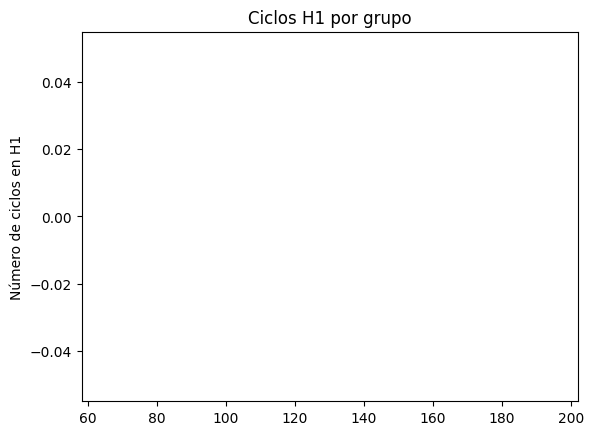

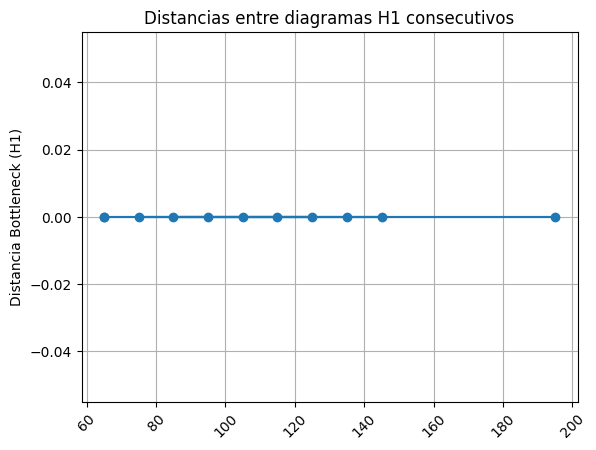

In [41]:
import matplotlib.pyplot as plt

counts = [len(diagrams[g]) for g in groups]
plt.bar(groups, counts)
plt.ylabel("Número de ciclos en H1")
plt.title("Ciclos H1 por grupo")
plt.show()

plt.plot(groups + [groups[0]], bottleneck_distances + [bottleneck_distances[0]], marker='o')
plt.ylabel("Distancia Bottleneck (H1)")
plt.title("Distancias entre diagramas H1 consecutivos")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


C:\Users\EdsonAlvarez\AppData\Local\Temp\ipykernel_28424\884314663.py:28: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



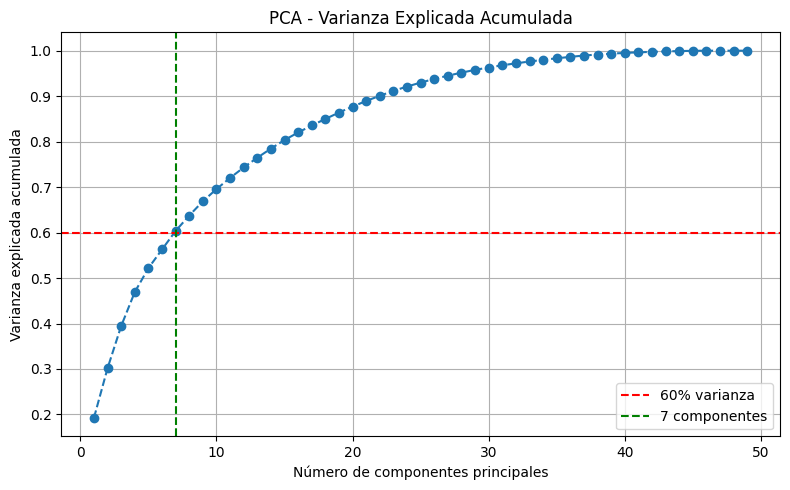

 PCA: 7 componentes conservan 60.36% de la varianza
 Matriz de distancias calculada. Espacio de puntos listo para TDA.


In [162]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import pdist, squareform
from sklearn.linear_model import LinearRegression
from datetime import datetime
import matplotlib.pyplot as plt


columnas_fecha = []
for col in df_time_series.columns:
    try:
        datetime.strptime(col.strip(), "%d/%m/%Y")
        columnas_fecha.append(col)
    except ValueError:
        continue

# 3. Derretir (melt) el DataFrame para convertir columnas de fecha en filas
df_prices = df_time_series.melt(
    id_vars=["ID"],  # columnas fijas (puedes ajustar)
    value_vars=columnas_fecha,
    var_name="Date",
    value_name="Value"
)
df_prices["Date"] = pd.to_datetime(df_prices["Date"])
# ------------------------------
# 1. Selección de variables numéricas y resumen series de tiempo
# ------------------------------

# A) Variables numéricas (excepto ID)
df_num = df_attributes.select_dtypes(include=[np.number]).drop(columns=["ID"])

# B) Crear resumen de precios por ID
def summarize_prices(df_prices):
    df_prices["log_price"] = np.log1p(df_prices["Value"])
    summary = df_prices.groupby("ID")["log_price"].agg([
        'mean', 'std'
    ]).rename(columns={"mean": "price_mean", "std": "price_std"})

    # Tendencia: regresión lineal día vs. precio
    df_prices['day'] = (pd.to_datetime(df_prices['Date']) - pd.to_datetime(df_prices['Date']).min()).dt.days
    trends = []

    for _, group in df_prices.groupby('ID'):
        X = group['day'].values.reshape(-1, 1)
        y = np.log1p(group['Value'].values)
        if len(np.unique(X)) > 1:
            slope = LinearRegression().fit(X, y).coef_[0]
        else:
            slope = 0.0
        trends.append(slope)

    summary['price_trend'] = trends
    return summary

df_price_summary = summarize_prices(df_prices)

# Unir con atributos por ID
df_merged = df_attributes.merge(df_price_summary, left_on="ID", right_index=True)

# ------------------------------
# 2. Eliminar baja varianza y alta correlación
# ------------------------------

# Selección de numéricas y variables temporales
df_all_num = df_merged.select_dtypes(include=[np.number]).drop(columns=["ID"])



# ------------------------------
# 3. Escalado
# ------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_all_num)

# ------------------------------
# 4. Ya aplicamos log1p al precio en el resumen → no necesario aquí
# ------------------------------

# ------------------------------
# 5. PCA (80%)
# ------------------------------

pca = PCA(n_components=0.60)
X_pca = pca.fit_transform(X_scaled)
pca_full = PCA().fit(X_scaled)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.60, color='r', linestyle='--', label='60% varianza')
plt.axvline(x=pca.n_components_, color='g', linestyle='--', label=f'{pca.n_components_} componentes')

plt.title('PCA - Varianza Explicada Acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print(f" PCA: {pca.n_components_} componentes conservan {pca.explained_variance_ratio_.sum():.2%} de la varianza")

# ------------------------------
# 6. Amenidades binarias → TruncatedSVD
# ------------------------------

binary_columns = df_attributes.columns[
    (df_attributes.dtypes == 'int64') & 
    (df_attributes.nunique() == 2) &
    (df_attributes.columns != 'ID')
]

X_binary = df_attributes[binary_columns]



# ------------------------------
# 7. Concatenar espacio final
# ------------------------------

# Aseguramos que IDs coincidan
ids = df_attributes["ID"].values
df_spacePCA = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])], index=ids)

df_spacePCA["ID"] = df_spacePCA.index

# ------------------------------
# 8. Matriz de distancias
# ------------------------------

dist_matrixPCA = squareform(pdist(df_spacePCA.drop(columns="ID").values, metric='euclidean'))
df_distPCA = pd.DataFrame(dist_matrixPCA, index=df_spacePCA["ID"], columns=df_spacePCA["ID"])

print(" Matriz de distancias calculada. Espacio de puntos listo para TDA.")


In [184]:
import plotly.express as px
import plotly.colors as pc

def plot_PCA_svd_space(df_space, color_column=None, discrete_colorscale=False):
    """
    Gráfico 3D del espacio embebido (PCA)
    
    Args:
        df_space (pd.DataFrame): DataFrame con columnas ['PCi', ..., 'ID']
        color_column (str, opcional): Columna para colorear los puntos.
        discrete_colorscale (bool): Si True, trata color_column como categórica ordenada.
    """
    df_plot = df_space.copy()

    if color_column:
        df_plot = df_plot.merge(df_attributes[['ID', color_column]], on='ID', how='left')
        
        if discrete_colorscale:
            # Generar una escala de color inspirada en hot_r con 10 colores
            hot_r_colors = pc.sequential.Hot_r[::-1]  # reversa del colormap Hot
            n_colors = df_plot[color_column].nunique()
            colors = pc.sample_colorscale(hot_r_colors, [i / (n_colors - 1) for i in range(n_colors)])

            # Crear un mapping de valor → color
            unique_vals = sorted(df_plot[color_column].dropna().unique())
            color_map = dict(zip(unique_vals, colors))

            df_plot["color_hex"] = df_plot[color_column].map(color_map)
            color_values = df_plot["color_hex"]
        else:
            color_values = df_plot[color_column]
    else:
        color_values = None

    fig = px.scatter_3d(
        df_plot,
        x="PC1", y="PC2", z="PC3",
        color=color_values,
        hover_name="ID",
        opacity=0.85,
        color_continuous_scale="hot",
        range_color=(0, 180),
        title="Espacio Embebido (PCA)",
        template="plotly_dark"
    )
    
    fig.update_layout(
        margin={"r":0, "t":40, "l":0, "b":0},
        paper_bgcolor="#111111",
        plot_bgcolor="#111111",
        font=dict(color="white"),
        scene=dict(
            xaxis=dict(title="PC1", backgroundcolor="#111111", gridcolor="gray"),
            yaxis=dict(title="PC2", backgroundcolor="#111111", gridcolor="gray"),
            zaxis=dict(title="PC3", backgroundcolor="#111111", gridcolor="gray")
        )
    )
    return fig



fig = plot_PCA_svd_space(df_spacePCA,color_column="Base fee")
fig.show()

In [164]:
import matplotlib.pyplot as plt
import gudhi as gd
import numpy as np
import imageio

plotfiles = []

distance_matrixPCA = df_distPCA.values
max_lengthsPCA = np.linspace(3, 5, 16)  # 8 frames desde 1 a 2.5

for i, max_len in enumerate(max_lengthsPCA):
    print(f"Generando frame {i+1} con max_edge_length={max_len:.2f}")
    # Crear complejo Rips
    rips_complexPCA = gd.RipsComplex(distance_matrix=distance_matrixPCA, max_edge_length=max_len)
    simplex_treePCA = rips_complexPCA.create_simplex_tree(max_dimension=3)

    coordspca = df_spacePCA[["PC1", "PC2", "PC3"]].values

    fig, axs = plt.subplots(1, 3, figsize=(15, 5), facecolor='black')
    for ax in axs:
        ax.set_facecolor('black')
        ax.tick_params(colors='white')  # Ejes blancos
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')
        ax.title.set_color('white')

    def draw_edges(ax, dim1, dim2):
        # Dibujar nervios
        for simplex, _ in simplex_treePCA.get_skeleton(1):
            if len(simplex) == 2:
                i_, j_ = simplex
                x = [coordspca[i_, dim1], coordspca[j_, dim1]]
                y = [coordspca[i_, dim2], coordspca[j_, dim2]]
                ax.plot(x, y, color='gray', linewidth=1)
        # Dibujar puntos azul claro
        ax.scatter(coordspca[:, dim1], coordspca[:, dim2], c='#add8e6', s=20)
        ax.set_xlabel(f"PC{dim1+1}")
        ax.set_ylabel(f"PC{dim2+1}")

    draw_edges(axs[0], 0, 1)
    axs[0].set_title("PC1 vs PC2")

    draw_edges(axs[1], 0, 2)
    axs[1].set_title("PC1 vs PC3")

    draw_edges(axs[2], 1, 2)
    axs[2].set_title("PC2 vs PC3")

    plt.suptitle(f"Complejo de Vietoris-Rips (max_edge_length={max_len:.2f})", color='white')
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    filename = f"rips_frame_{i}.png"
    plt.savefig(filename, facecolor='black')
    plotfiles.append(filename)
    plt.close()

# Crear gif
images = [imageio.imread(f) for f in plotfiles]
imageio.mimsave('rips_complex_PCA_animation.gif', images, fps=2, loop=0)

print("GIF creado: rips_complex_PCA_animation.gif")

Generando frame 1 con max_edge_length=3.00
Generando frame 2 con max_edge_length=3.13
Generando frame 3 con max_edge_length=3.27
Generando frame 4 con max_edge_length=3.40
Generando frame 5 con max_edge_length=3.53
Generando frame 6 con max_edge_length=3.67
Generando frame 7 con max_edge_length=3.80
Generando frame 8 con max_edge_length=3.93
Generando frame 9 con max_edge_length=4.07
Generando frame 10 con max_edge_length=4.20
Generando frame 11 con max_edge_length=4.33
Generando frame 12 con max_edge_length=4.47
Generando frame 13 con max_edge_length=4.60
Generando frame 14 con max_edge_length=4.73
Generando frame 15 con max_edge_length=4.87
Generando frame 16 con max_edge_length=5.00


C:\Users\EdsonAlvarez\AppData\Local\Temp\ipykernel_28424\3531846819.py:58: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



GIF creado: rips_complex_PCA_animation.gif


In [175]:
def plot_PCA_rips_projections(df_space, simplex_tree, color_column=None):
    """
    Muestra proyecciones XY, XZ, YZ del complejo de Rips con subplots.
    """
    df_plot = df_space.copy()
    coords = df_plot[["PC1", "PC2", "PC3"]].values

  
    if color_column:
        df_plot = df_plot.merge(df_attributes[['ID', color_column]], on='ID', how='left')
        color_values = df_plot[color_column]
    else:
        color_values = 'lightblue'

    # Crear figura con 3 subplots
    fig = make_subplots(
        rows=1, cols=3,
        subplot_titles=("PC1 vs PC2", "PC1 vs PC3", "PC2 vs PC3"),
        horizontal_spacing=0.05
    )

    def get_edges(dim1, dim2):
        edge_traces = []
        for simplex, _ in simplex_tree.get_skeleton(1):
            if len(simplex) == 2:
                i, j = simplex
                xi, yi = coords[i, dim1], coords[i, dim2]
                xj, yj = coords[j, dim1], coords[j, dim2]
                edge_traces.append(go.Scatter(
                    x=[xi, xj, None], y=[yi, yj, None],
                    mode='lines',
                    line=dict(color='gray', width=1),
                    hoverinfo='none',
                    showlegend=False
                ))
        return edge_traces

    # Nodos (puntos)
    scatter_args = dict(
        mode='markers',
        marker=dict(
            size=4,
            color=color_values,
            colorscale='Hot',
            showscale=True if color_column else False,
            opacity=0.8,
            colorbar=dict(title=color_column) if color_column else None
        ),
        text=df_plot["ID"],
        hoverinfo='text'
    )

    # --- Subplot 1: XY ---
    for trace in get_edges(0, 1): fig.add_trace(trace, row=1, col=1)
    fig.add_trace(go.Scatter(
        x=df_plot["PC1"], y=df_plot["PC2"], **scatter_args
    ), row=1, col=1)

    # --- Subplot 2: XZ ---
    for trace in get_edges(0, 2): fig.add_trace(trace, row=1, col=2)
    fig.add_trace(go.Scatter(
        x=df_plot["PC1"], y=df_plot["PC3"], **scatter_args
    ), row=1, col=2)

    # --- Subplot 3: YZ ---
    for trace in get_edges(1, 2): fig.add_trace(trace, row=1, col=3)
    fig.add_trace(go.Scatter(
        x=df_plot["PC2"], y=df_plot["PC3"], **scatter_args
    ), row=1, col=3)

    fig.update_layout(
            height=500,
            width=1200,
            title_text="Proyecciones del complejo de Vietoris–Rips (1-símplices) con PCA",
            template="plotly_dark",
            margin=dict(l=20, r=20, t=60, b=20),
    )
    return fig

distance_matrixPCA = df_distPCA.values

rips_complexPCA = gd.RipsComplex(distance_matrix=distance_matrixPCA, max_edge_length=3)
simplex_treePCA = rips_complexPCA.create_simplex_tree(max_dimension=3)

# === USO ===
fig = plot_PCA_rips_projections(df_spacePCA, simplex_treePCA,"Base fee")
fig.show()

In [174]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_rips_complex_PCA_3d(df_space, simplex_tree, color_column=None):
    """
    Visualiza en 3D el complejo de Vietoris-Rips (puntos + aristas).
    """
    df_plot = df_space.copy()

    # Extraer coordenadas 3D
    coords = df_plot[["PC1", "PC2", "PC3"]].values
    id_map = dict(zip(df_plot["ID"], range(len(df_plot))))  # ID a índice

    # Color opcional
    if color_column:
        df_plot = df_plot.merge(df_attributes[['ID', color_column]], on='ID', how='left')
        color_values = df_plot[color_column]
    else:
        color_values = None

    # --- Crear trazas de aristas (1-símplices) ---
    edges = []
    for simplex, filtration in simplex_tree.get_skeleton(1):
        if len(simplex) == 2:
            i, j = simplex
            xi, yi, zi = coords[i]
            xj, yj, zj = coords[j]
            edges.append(go.Scatter3d(
                x=[xi, xj, None],  # None para separar segmentos
                y=[yi, yj, None],
                z=[zi, zj, None],
                mode='lines',
                line=dict(color='gray', width=1),
                hoverinfo='none',
                showlegend=False
            ))

    # --- Crear traza de puntos ---
    scatter = go.Scatter3d(
        x=df_plot["PC1"],
        y=df_plot["PC2"],
        z=df_plot["PC3"],
        mode='markers',
        marker=dict(
            size=4,
            color=color_values if color_column else 'lightblue',
            colorscale="Hot",
            opacity=0.8,
            colorbar=dict(title=color_column) if color_column else None
        ),
        text=df_plot["ID"],
        name="Puntos"
    )

    # --- Figura final ---
    fig = go.Figure(data=[scatter] + edges)
    fig.update_layout(
        title="Complejo de Vietoris–Rips en espacio UMAP+SVD",
        template="plotly_dark",
        margin=dict(l=0, r=0, b=0, t=40),
        scene=dict(
            xaxis_title="UMAP1",
            yaxis_title="UMAP2",
            zaxis_title="UMAP3",
            xaxis=dict(backgroundcolor="#111111", gridcolor="gray"),
            yaxis=dict(backgroundcolor="#111111", gridcolor="gray"),
            zaxis=dict(backgroundcolor="#111111", gridcolor="gray")
        )
    )
    return fig
distance_matrixPCA = df_distPCA.values

rips_complexPCA = gd.RipsComplex(distance_matrix=distance_matrixPCA, max_edge_length=3)
simplex_treePCA = rips_complexPCA.create_simplex_tree(max_dimension=3)

print(f"✔️ Complejo Rips (por matriz de distancias) creado con {simplex_treePCA.num_simplices()} símplices.")
for simplex, filtration in simplex_treePCA.get_filtration():
    if len(simplex) <= 2:
        print(f"Simplex: {simplex}, Filtration: {filtration}")
# === USO ===
fig = plot_rips_complex_PCA_3d(df_spacePCA, simplex_treePCA,"Base fee")
fig.show()


✔️ Complejo Rips (por matriz de distancias) creado con 990 símplices.
Simplex: [0], Filtration: 0.0
Simplex: [1], Filtration: 0.0
Simplex: [2], Filtration: 0.0
Simplex: [3], Filtration: 0.0
Simplex: [4], Filtration: 0.0
Simplex: [5], Filtration: 0.0
Simplex: [6], Filtration: 0.0
Simplex: [7], Filtration: 0.0
Simplex: [8], Filtration: 0.0
Simplex: [9], Filtration: 0.0
Simplex: [10], Filtration: 0.0
Simplex: [11], Filtration: 0.0
Simplex: [12], Filtration: 0.0
Simplex: [13], Filtration: 0.0
Simplex: [14], Filtration: 0.0
Simplex: [15], Filtration: 0.0
Simplex: [16], Filtration: 0.0
Simplex: [17], Filtration: 0.0
Simplex: [18], Filtration: 0.0
Simplex: [19], Filtration: 0.0
Simplex: [20], Filtration: 0.0
Simplex: [21], Filtration: 0.0
Simplex: [22], Filtration: 0.0
Simplex: [23], Filtration: 0.0
Simplex: [24], Filtration: 0.0
Simplex: [25], Filtration: 0.0
Simplex: [26], Filtration: 0.0
Simplex: [27], Filtration: 0.0
Simplex: [28], Filtration: 0.0
Simplex: [29], Filtration: 0.0
Simplex: [

Dim 1: nace en 2.162112284290744, muere en inf
Dim 1: nace en 2.1533498310776853, muere en inf
Dim 1: nace en 1.4074961032373863, muere en 1.643309068620652
Dim 1: nace en 1.824134283068689, muere en 1.8354207216859761
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, muere en inf
Dim 0: nace en 0.0, mu

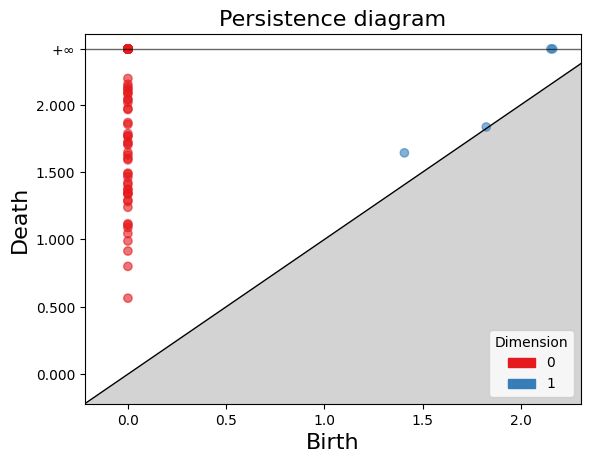

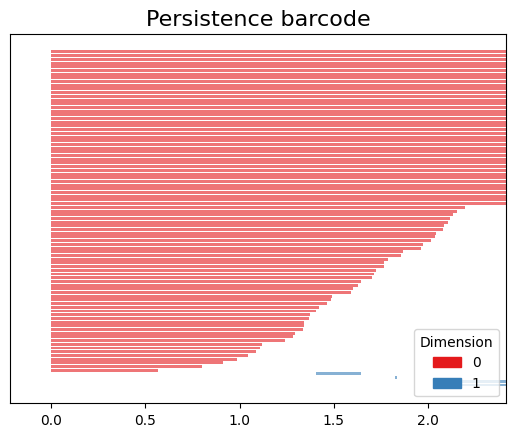

In [168]:
persistence_plots_gudhi(distance_matrixPCA)

In [173]:
betti_evolution(distance_matrixPCA,np.linspace(2,5, 100)
)